In [4]:
from khaiii import KhaiiiApi
import docx2txt
import numpy as np
import pandas as pd
from collections import Counter
import re
import networkx as nx

In [5]:
text = docx2txt.process('2000000000_홍길동.docx')
print(text)

우리생활 속의 생체공학



김혜영(2019113108)

동국대학교 글로벌 무역학과



- (서론1) 동영상의 주요 내용이나 흥미롭거나 관심 있었던 내용 소개

: 이 동영상은 생체공학에 대해 다룬 영상이다. 연설자 휴 허는 산악 등반사고로 동상을 입어 두 다리를 절단한 것을 계기로 사람들의 장애를 제거할 수 있는 기술이 필요하다고 생각하였다. 그는 생체공학이 더 좋아져 언젠가, 미래에는 팔다리 세 군데가 없는 부상도 완전히 회복시킬 수 있어야 한다고 생각하였고 MIT 미디어 랩에 극단적 생체공학 센터를 설립하였다. 그는 여러 연구를 통해 연동이 조직 전체의 변화에 따라 일어나야 하는 최적의 시점을 찾아 생체 공학적 의족을 만들어냈다. 또 그는 미래에는 옷, 신발, 보조기, 인공기관들이 더 이상 디자인되거나 자동화과정으로 생산되는 것이 아닌 자료를 이용한 수치적 체계를 통해 생산될 것이라고 말하였다. 의족 사용하는 두 가지 사례를 더 말한 후 보스톤 테러 사건으로 왼쪽 다리를 잃은 무도회 댄서 아드리안의 이야기를 하였다. 연설자는 그녀에게 의족을 만들어주어 그녀의 삶인 춤으로 되돌아갈 수 있도록 해주자는 생각에 200일 이상 춤에 대해 연구를 하고 아드리안에게 의족을 통해 무대에 설 수 있도록 해주었다. 영상은 아드리안의 춤으로 마무리가 되었다. 생체공학이 미래에 어떤 변화를 불러올지, 그 것이 인간에게 얼마나 도움이 되는지를 설명하는 것이 주요 내용이다.

나는 그가 두 다리를 절단하였음에도 좌절하지 않고, 오히려 다른 사람의 장애를 제거하는 발전된 기술을 가져야겠다는 미래지향적인 생각을 한 것이정말 대단하다고 생각했다. 만약 나에게 이런 일이 생겼더라면 앞으로 살아갈 미래에 대한 걱정과 좌절이 먼저 앞섰을것 같은데 말이다. 그가 위와 같은 생각을 하였기에 의족을 개발하고 생체공학 센터를 설립하고 연설까지 할 수 있다는 것이라 생각이 되었고 걱정 가득한 부정적인 생각을 먼저 하게 되는 나를 돌아보게 되었던 것 같다. 흥미로웠던 부분은 사례로 나왔던 분들의

## 명사 형태소 추출

In [6]:
api = KhaiiiApi()
sentence_list = []
morphs_list = []

df = pd.read_excel('stopwords.xlsx')
stopwords = list(df['불용어'])

document = text.split('\n')
for sentence in document:
    
    if sentence != '':
        # 모든 문장
        if '.' in sentence:
            sentence_detail = sentence.split('. ')
            for i in sentence_detail:
                if i != '':
                    sentence_list.append(i)
        else:
            sentence_list.append(sentence)

sentence_list

['우리생활 속의 생체공학',
 '김혜영(2019113108)',
 '동국대학교 글로벌 무역학과',
 '- (서론1) 동영상의 주요 내용이나 흥미롭거나 관심 있었던 내용 소개',
 ': 이 동영상은 생체공학에 대해 다룬 영상이다',
 '연설자 휴 허는 산악 등반사고로 동상을 입어 두 다리를 절단한 것을 계기로 사람들의 장애를 제거할 수 있는 기술이 필요하다고 생각하였다',
 '그는 생체공학이 더 좋아져 언젠가, 미래에는 팔다리 세 군데가 없는 부상도 완전히 회복시킬 수 있어야 한다고 생각하였고 MIT 미디어 랩에 극단적 생체공학 센터를 설립하였다',
 '그는 여러 연구를 통해 연동이 조직 전체의 변화에 따라 일어나야 하는 최적의 시점을 찾아 생체 공학적 의족을 만들어냈다',
 '또 그는 미래에는 옷, 신발, 보조기, 인공기관들이 더 이상 디자인되거나 자동화과정으로 생산되는 것이 아닌 자료를 이용한 수치적 체계를 통해 생산될 것이라고 말하였다',
 '의족 사용하는 두 가지 사례를 더 말한 후 보스톤 테러 사건으로 왼쪽 다리를 잃은 무도회 댄서 아드리안의 이야기를 하였다',
 '연설자는 그녀에게 의족을 만들어주어 그녀의 삶인 춤으로 되돌아갈 수 있도록 해주자는 생각에 200일 이상 춤에 대해 연구를 하고 아드리안에게 의족을 통해 무대에 설 수 있도록 해주었다',
 '영상은 아드리안의 춤으로 마무리가 되었다',
 '생체공학이 미래에 어떤 변화를 불러올지, 그 것이 인간에게 얼마나 도움이 되는지를 설명하는 것이 주요 내용이다.',
 '나는 그가 두 다리를 절단하였음에도 좌절하지 않고, 오히려 다른 사람의 장애를 제거하는 발전된 기술을 가져야겠다는 미래지향적인 생각을 한 것이정말 대단하다고 생각했다',
 '만약 나에게 이런 일이 생겼더라면 앞으로 살아갈 미래에 대한 걱정과 좌절이 먼저 앞섰을것 같은데 말이다',
 '그가 위와 같은 생각을 하였기에 의족을 개발하고 생체공학 센터를 설립하고 연설까지 할 수 있다는 것이라 생각이 되었고 걱정 가득한 부정적인 생각을 먼저 하게

In [7]:
morphs_list = []
sentence_nouns_list = []

api = KhaiiiApi()

# 모든 문장에서 명사만 추출
for sentence in sentence_list:
    morphs_value = []
    for word in api.analyze(sentence):
        for morph in word.morphs:
            if morph.tag == 'NNG' and morph.lex not in stopwords: # 명사 추출, 불용어 제거
                morphs_list.append(morph.lex) # 문장별 단어 추출
                morphs_value.append(morph.lex) # 모든 단어 추출
    sentence_nouns_list.append(morphs_value) # 각 문장별 명사 리스트
    
morphs_list[0:20]

['생활',
 '생체',
 '공학',
 '글로벌',
 '무역학',
 '론',
 '주요',
 '내용',
 '흥미',
 '관심',
 '내용',
 '소개',
 '동영상',
 '생체',
 '공학',
 '영상',
 '연설자',
 '산악',
 '반',
 '사고']

In [8]:
len(morphs_list) # 불용어로 350개 -> 327개로 줄임

327

In [10]:
sentence_nouns_list[0:20] # 각 문장별 단어

[['생활', '생체', '공학'],
 [],
 ['글로벌', '무역학'],
 ['론', '주요', '내용', '흥미', '관심', '내용', '소개'],
 ['동영상', '생체', '공학', '영상'],
 ['연설자',
  '산악',
  '반',
  '사고',
  '동상',
  '다리',
  '절단',
  '계기',
  '장애',
  '제거',
  '기술',
  '필요',
  '생각'],
 ['생체',
  '공학',
  '미래',
  '팔다리',
  '부상',
  '회복',
  '생각',
  '미디어',
  '랩',
  '극단',
  '생체',
  '공학',
  '센터',
  '설립'],
 ['연구', '연동', '조직', '전체', '변화', '최적', '시점', '생체', '공학', '의족'],
 ['미래',
  '옷',
  '신발',
  '보조기',
  '인공',
  '기관',
  '디자인되',
  '자동',
  '과정',
  '생산',
  '자료',
  '이용',
  '수치',
  '체계',
  '생산'],
 ['의족', '사용', '사례', '후', '테러', '사건', '왼쪽', '다리', '무도회', '댄', '아드', '이야기'],
 ['연설자', '족', '삶', '춤', '생각', '춤', '연구', '아드', '족', '무대'],
 ['영상', '아드', '춤', '마무리'],
 ['생체', '공학', '미래', '변화', '인간', '도움', '설명', '주요', '내용'],
 ['다리', '절단', '좌절', '장애', '제거', '발전', '기술', '미래', '지향', '생각', '생각'],
 ['미래', '걱정', '좌절'],
 ['위', '생각', '족', '개발', '생체', '공학', '센터', '설립', '연설', '생각', '걱정', '부정', '생각'],
 ['흥미', '부분', '사례', '영상'],
 ['다리', '의수족', '착용', '이전', '동일', '삶', '감동'],
 ['본론', '발레리', '노력'],

## 출현 빈도 상위 20개 단어 기준 matrix 생성

In [11]:
num_top_nouns = 20 
morphs_counter = Counter(morphs_list)
morphs_top_nouns = dict(morphs_counter.most_common(num_top_nouns))
morphs_top_nouns

{'생각': 19,
 '생체': 10,
 '공학': 10,
 '기술': 8,
 '족': 8,
 '의족': 7,
 '사용': 7,
 '미래': 6,
 '춤': 6,
 '목소리': 6,
 '장애': 5,
 '연구': 5,
 '내용': 4,
 '영상': 4,
 '연설자': 4,
 '다리': 4,
 '아드': 4,
 '삶': 4,
 '발전': 4,
 '가격': 4}

In [13]:
word2id = {w:i for i,w in enumerate(morphs_top_nouns.keys())}
id2word = {i:w for i,w in enumerate(morphs_top_nouns.keys())}
print(word2id)
print()
print(id2word)

{'생각': 0, '생체': 1, '공학': 2, '기술': 3, '족': 4, '의족': 5, '사용': 6, '미래': 7, '춤': 8, '목소리': 9, '장애': 10, '연구': 11, '내용': 12, '영상': 13, '연설자': 14, '다리': 15, '아드': 16, '삶': 17, '발전': 18, '가격': 19}

{0: '생각', 1: '생체', 2: '공학', 3: '기술', 4: '족', 5: '의족', 6: '사용', 7: '미래', 8: '춤', 9: '목소리', 10: '장애', 11: '연구', 12: '내용', 13: '영상', 14: '연설자', 15: '다리', 16: '아드', 17: '삶', 18: '발전', 19: '가격'}


In [14]:
adjacent_matrix = np.zeros((num_top_nouns, num_top_nouns),int)
for sentence_nouns in sentence_nouns_list:
    for wi, i in word2id.items():
        if wi in sentence_nouns:
            for wj, j in word2id.items():
                if i != j and wj in sentence_nouns:
                    adjacent_matrix[i][j] += 1
adjacent_matrix

array([[0, 2, 2, 3, 4, 0, 1, 3, 1, 0, 4, 1, 0, 0, 3, 2, 1, 2, 3, 2],
       [2, 0, 9, 1, 2, 3, 1, 2, 2, 1, 0, 3, 1, 1, 0, 0, 0, 0, 0, 0],
       [2, 9, 0, 1, 2, 3, 1, 2, 2, 1, 0, 3, 1, 1, 0, 0, 0, 0, 0, 0],
       [3, 1, 1, 0, 1, 1, 0, 2, 0, 2, 3, 0, 0, 0, 2, 2, 0, 1, 3, 1],
       [4, 2, 2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 0, 1, 2, 0, 1, 1, 0, 2],
       [0, 3, 3, 1, 1, 0, 2, 0, 2, 0, 0, 3, 0, 0, 0, 1, 2, 0, 0, 1],
       [1, 1, 1, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1],
       [3, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 2, 0],
       [1, 2, 2, 0, 1, 2, 1, 0, 0, 0, 0, 3, 0, 1, 1, 0, 2, 1, 0, 0],
       [0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [4, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 3, 0],
       [1, 3, 3, 0, 1, 3, 1, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [3, 0, 0, 2, 2, 0, 1, 1, 1,

## 의미망 분석

### 1. 상위 20개 단어들에 대한 타 단어들과의 연관 정도

In [18]:
adjacent_df = pd.DataFrame(adjacent_matrix, index=morphs_top_nouns.keys(), columns=morphs_top_nouns.keys())
adjacent_df

,생각,생체,공학,기술,족,의족,사용,미래,춤,목소리,장애,연구,내용,영상,연설자,다리,아드,삶,발전,가격
생각,0,2,2,3,4,0,1,3,1,0,4,1,0,0,3,2,1,2,3,2
생체,2,0,9,1,2,3,1,2,2,1,0,3,1,1,0,0,0,0,0,0
공학,2,9,0,1,2,3,1,2,2,1,0,3,1,1,0,0,0,0,0,0
기술,3,1,1,0,1,1,0,2,0,2,3,0,0,0,2,2,0,1,3,1
족,4,2,2,1,0,1,2,0,1,1,0,1,0,1,2,0,1,1,0,2
의족,0,3,3,1,1,0,2,0,2,0,0,3,0,0,0,1,2,0,0,1
사용,1,1,1,0,2,2,0,0,1,0,0,1,0,1,1,1,1,0,0,1
미래,3,2,2,2,0,0,0,0,0,0,2,0,1,0,1,1,0,0,2,0
춤,1,2,2,0,1,2,1,0,0,0,0,3,0,1,1,0,2,1,0,0
목소리,0,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
adjacent_df.to_csv('test.csv')

### 2. 의미망 시각화

In [25]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

In [22]:
word_network = nx.from_numpy_matrix(adjacent_matrix)
list(word_network.adjacency())

[(0,
  {1: {'weight': 2},
   2: {'weight': 2},
   3: {'weight': 3},
   4: {'weight': 4},
   6: {'weight': 1},
   7: {'weight': 3},
   8: {'weight': 1},
   10: {'weight': 4},
   11: {'weight': 1},
   14: {'weight': 3},
   15: {'weight': 2},
   16: {'weight': 1},
   17: {'weight': 2},
   18: {'weight': 3},
   19: {'weight': 2}}),
 (1,
  {0: {'weight': 2},
   2: {'weight': 9},
   3: {'weight': 1},
   4: {'weight': 2},
   5: {'weight': 3},
   6: {'weight': 1},
   7: {'weight': 2},
   8: {'weight': 2},
   9: {'weight': 1},
   11: {'weight': 3},
   12: {'weight': 1},
   13: {'weight': 1}}),
 (2,
  {0: {'weight': 2},
   1: {'weight': 9},
   3: {'weight': 1},
   4: {'weight': 2},
   5: {'weight': 3},
   6: {'weight': 1},
   7: {'weight': 2},
   8: {'weight': 2},
   9: {'weight': 1},
   11: {'weight': 3},
   12: {'weight': 1},
   13: {'weight': 1}}),
 (3,
  {0: {'weight': 3},
   1: {'weight': 1},
   2: {'weight': 1},
   4: {'weight': 1},
   5: {'weight': 1},
   7: {'weight': 2},
   9: {'weight'

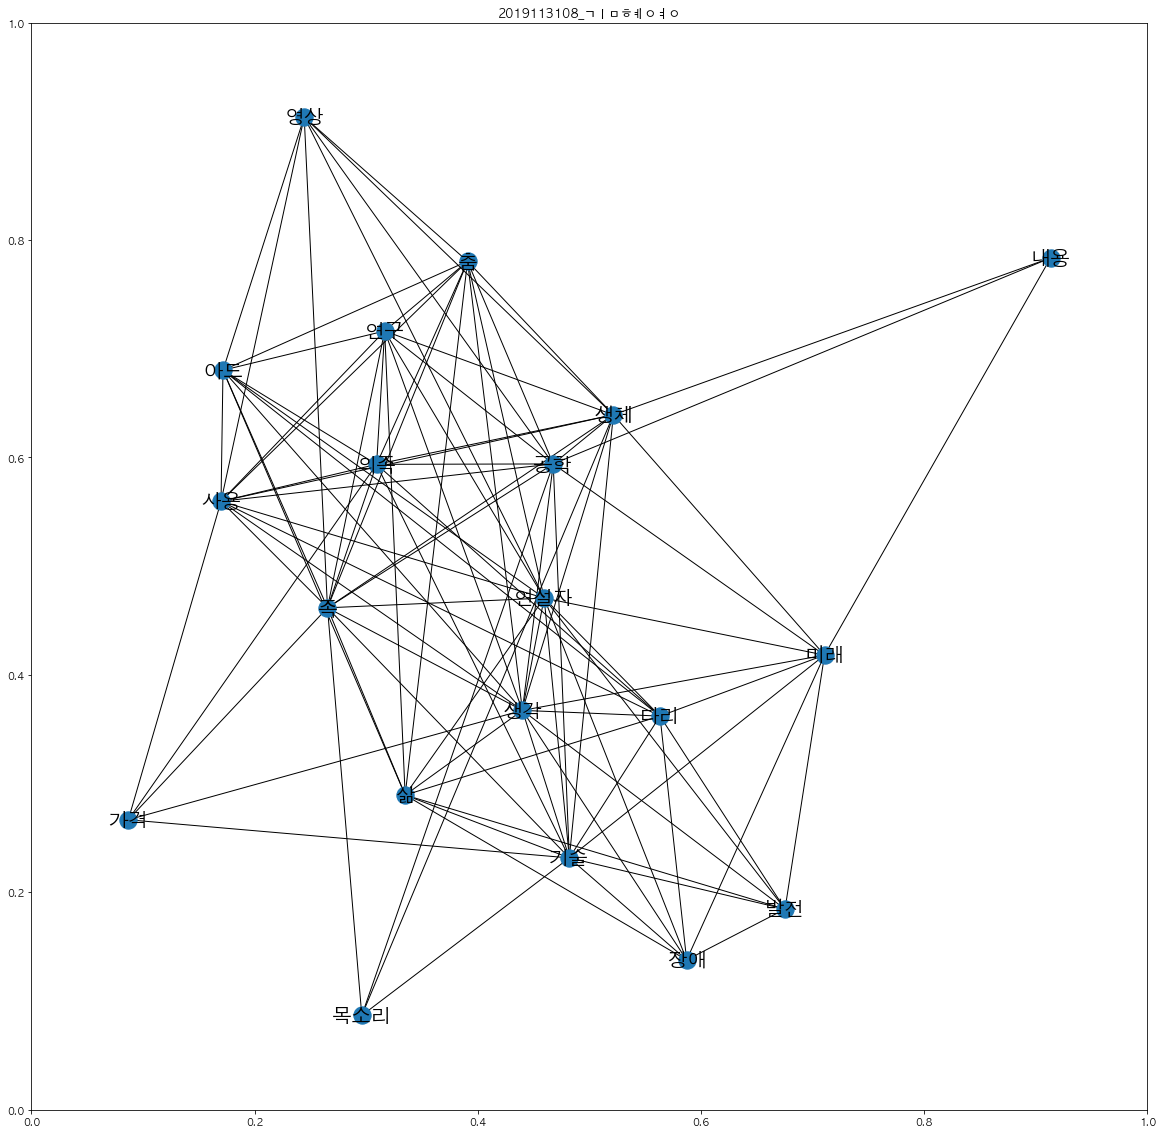

In [44]:
# font_path="./font/NanumBarunGothic.ttf"
# font_name = fm.FontProperties(fname=font_path).get_name()
# rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False
rc('font', family='NanumBarunGothic')


fig = plt.figure()
plt.rcParams['font.family'] = 'AppleGothic'

plt.title('2000000000_홍길동.docx')
fig.set_size_inches(20, 20)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'size' : 2
}
nx.draw(word_network, labels=id2word, ax=ax, font_family='AppleGothic', font_size=20)

plt.savefig('test.png')
plt.show()